In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import fates_xarray_funcs
from fates_xarray_funcs import monthly_to_annual

In [3]:
cases = {'S0':'f19_0007_trendyS0_39e91e09b5_c2da27fd',
         'S1':'f19_0008_trendyS1_39e91e09b5_c2da27fd',
         'S3':'f19_0009_trendyS3_parta_39e91e09b5_c2da27fd'}

In [4]:
fins_annual = {}
for i, label in enumerate(cases):
    case = cases[label]
    fins_annual.update({label:xr.open_dataset('/global/homes/c/cdkoven/scratch/e3sm_scratch/pm-cpu/'+case+'/run/'+case+'.annual.sofar.nc')})
    fins_annual[label]['time'] = np.arange(len(fins_annual[label]['time'])) + 1701.

In [5]:
fins_monthly = {}
for i, label in enumerate(cases):
    case = cases[label]
    fins_monthly.update({label:xr.open_dataset('/global/homes/c/cdkoven/scratch/e3sm_scratch/pm-cpu/'+case+'/run/'+case+'.monthly.sofar.nc')})
    fins_monthly[label]['time'] = np.arange(len(fins_monthly[label]['time']))/12. + 1701.
                                       

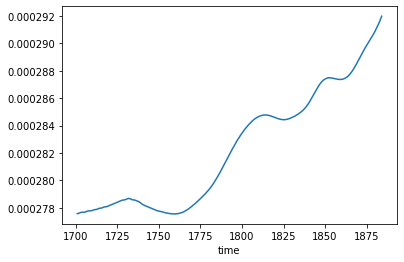

In [6]:
(fins_annual['S1']['PCO2'].mean(dim=['lat','lon'])/fins_annual['S1']['PBOT'].mean(dim=['lat','lon'])).plot()

In [7]:
co2file = xr.open_dataset('/global/cfs/cdirs/e3sm/inputdata/atm/datm7/TRENDY2025/CO2field/fco2_datm_global_simyr_1700-2024_TRENDY_c250625.nc', decode_times=False)

(277.6, 300.0)

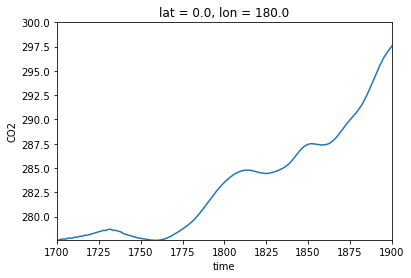

In [10]:
co2file['time'] = np.arange(len(co2file['time']))+1700.
co2file['CO2'].plot()
plt.xlim(1700,1900)
plt.ylim(277.6,300)

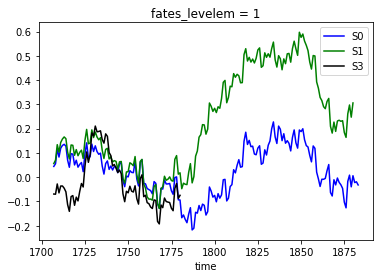

In [9]:
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S0']['NBP'] + fins_monthly['S0']['FATES_SEEDS_IN_EXTERN_EL'].isel(fates_levelem=0)*1e3*fins_annual['S0']['FATES_FRACTION'].isel(time=0)))* 86400 * 365 * 1e-15 * fins_annual['S0']['area'] * 1e6).sum(dim=('lat','lon')).rolling(time=10, center=True).mean().plot(color='Blue', linestyle='solid', label='S0')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S1']['NBP'] + fins_monthly['S1']['FATES_SEEDS_IN_EXTERN_EL'].isel(fates_levelem=0)*1e3*fins_annual['S1']['FATES_FRACTION'].isel(time=0)))* 86400 * 365 * 1e-15 * fins_annual['S1']['area'] * 1e6).sum(dim=('lat','lon')).rolling(time=10, center=True).mean().plot(color='Green', linestyle='solid', label='S1')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S3']['NBP'] + fins_monthly['S3']['FATES_SEEDS_IN_EXTERN_EL'].isel(fates_levelem=0)*1e3*fins_annual['S3']['FATES_FRACTION'].isel(time=0)))* 86400 * 365 * 1e-15 * fins_annual['S3']['area'] * 1e6).sum(dim=('lat','lon')).rolling(time=10, center=True).mean().plot(color='Black', linestyle='solid', label='S3')

plt.legend()